<a href="https://colab.research.google.com/github/chyj0805/Project_2/blob/Yujie-branch/Data_Prepareation%26training_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import pandas as pd

def get_stock_historical_data(api_key, stock_symbol):
    # Define the base URL and API parameters
    base_url = "https://www.alphavantage.co/query"
    function = "TIME_SERIES_DAILY"
    outputsize = "full"
    datatype = "json"
    params = {
        "function": function,
        "symbol": stock_symbol,
        "outputsize": outputsize,
        "datatype": datatype,
        "apikey": api_key
    }

    # Send API request and get JSON response
    response = requests.get(base_url, params=params)
    data = response.json()

    # Extract daily time series data
    time_series = data["Time Series (Daily)"]

    data_list = []
    for date, details in time_series.items():
        # Extract individual data points for each day
        row = {
            "Date": date,
            "Open": details["1. open"],
            "High": details["2. high"],
            "Low": details["3. low"],
            "Close": details["4. close"],
            "Volume": details["5. volume"]
        }
        data_list.append(row)

    # Create a Pandas DataFrame
    df = pd.DataFrame(data_list)
    df["Date"] = pd.to_datetime(df["Date"])
    df = df.sort_values(by="Date")

    # Save DataFrame to a CSV file
    csv_filename = f"{stock_symbol}_historical_data.csv"
    df.to_csv(csv_filename, index=False)

    print(f"Data saved to {csv_filename}")

# Example usage: Replace 'api_key' and 'stock_symbol' with your actual values
api_key = "4FHTO2GAT3NL1EZ8"
stock_symbol = "IYW"
get_stock_historical_data(api_key, stock_symbol)

Data saved to IYW_historical_data.csv


In [25]:
df_energy = pd.read_csv("Stock_data/IYE_historical_data.csv")


df_energy["Date"] = pd.to_datetime(df_energy["Date"])

In [27]:
df_energy

,Date,Open,High,Low,Close,Volume
0,2000-06-16,51.61,51.78,51.55,51.77,2000
1,2000-06-19,51.53,51.53,50.63,50.63,2400
2,2000-06-20,50.11,50.11,49.78,49.78,1000
3,2000-06-21,50.44,51.70,50.44,51.67,3200
4,2000-06-22,51.92,51.92,50.52,50.53,2100
...,...,...,...,...,...,...
5829,2023-08-18,46.02,46.77,45.92,46.71,357874
5830,2023-08-21,46.91,47.12,46.17,46.48,435015
5831,2023-08-22,46.57,46.68,46.10,46.12,637860
5832,2023-08-23,45.71,46.05,45.28,46.00,449799


In [28]:
df_financials = pd.read_csv("Stock_data/IYF_historical_data.csv")
df_financials["Date"] = pd.to_datetime(df_financials["Date"])

In [29]:
df_financials

,Date,Open,High,Low,Close,Volume
0,2000-05-26,91.02,91.020,91.0200,91.02,0
1,2000-05-30,71.59,71.590,71.5900,71.59,0
2,2000-05-31,73.63,73.630,73.6300,73.63,200
3,2000-06-01,73.88,75.690,73.8800,75.42,1000
4,2000-06-02,76.91,78.410,76.9100,78.31,2200
...,...,...,...,...,...,...
5843,2023-08-18,75.43,76.130,75.3500,75.87,96869
5844,2023-08-21,76.00,76.170,75.2100,75.75,90171
5845,2023-08-22,75.79,75.950,74.7485,74.85,167562
5846,2023-08-23,74.87,75.679,74.8500,75.67,124109


In [30]:
df_technology = pd.read_csv("Stock_data/IYW_historical_data.csv")
df_technology["Date"] = pd.to_datetime(df_technology["Date"])

In [32]:
df_technology

,Date,Open,High,Low,Close,Volume
0,2000-05-19,111.10,111.10,109.80,109.80,20000
1,2000-05-22,106.00,106.00,106.00,106.00,100
2,2000-05-23,109.30,109.30,108.00,108.40,26000
3,2000-05-24,102.90,107.30,99.50,107.30,24100
4,2000-05-25,110.40,110.50,105.80,105.80,16200
...,...,...,...,...,...,...
5848,2023-08-18,103.30,104.91,103.16,104.50,489626
5849,2023-08-21,105.07,106.67,104.94,106.45,458376
5850,2023-08-22,107.30,107.41,106.15,106.33,1124665
5851,2023-08-23,106.69,108.81,106.69,108.43,371328


In [53]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math

# Energy sector test model

In [42]:
x = df_energy[["Open", "High", "Low", "Volume"]]
y = df_energy["Close"]
x = x.to_numpy()
y = y.to_numpy()
y = y.reshape(-1, 1)

In [43]:
model_energy = Sequential()
model_energy.add(LSTM(128, return_sequences=True, input_shape= (x.shape[1], 1)))
model_energy.add(Dropout(0.2))  # Dropout layer to forget 20% of neurons

model_energy.add(LSTM(64, return_sequences=False))
model_energy.add(Dropout(0.2))

model_energy.add(Dense(25))
model_energy.add(Dense(1))
model_energy.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 4, 128)            66560     
                                                                 
 dropout (Dropout)           (None, 4, 128)            0         
                                                                 
 lstm_4 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 25)                1625      
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117,619
Trainable params: 117,619
Non-tr

Epoch 1/50
114/114 [==============================] - 21s 153ms/step - loss: 0.0260 - val_loss: 8.8154e-04
Epoch 2/50
114/114 [==============================] - 18s 155ms/step - loss: 0.0076 - val_loss: 5.5036e-04
Epoch 3/50
114/114 [==============================] - 17s 145ms/step - loss: 0.0064 - val_loss: 5.6568e-04
Epoch 4/50
114/114 [==============================] - 16s 144ms/step - loss: 0.0058 - val_loss: 4.9220e-04
Epoch 5/50
114/114 [==============================] - 18s 157ms/step - loss: 0.0055 - val_loss: 6.2770e-04
Epoch 6/50
114/114 [==============================] - 16s 142ms/step - loss: 0.0056 - val_loss: 5.3453e-04
Epoch 7/50
114/114 [==============================] - 17s 150ms/step - loss: 0.0052 - val_loss: 7.0786e-04
Epoch 8/50
114/114 [==============================] - 20s 171ms/step - loss: 0.0052 - val_loss: 5.1453e-04
Epoch 9/50
114/114 [==============================] - 18s 155ms/step - loss: 0.0045 - val_loss: 4.9553e-04
Epoch 10/50
114/114 [================

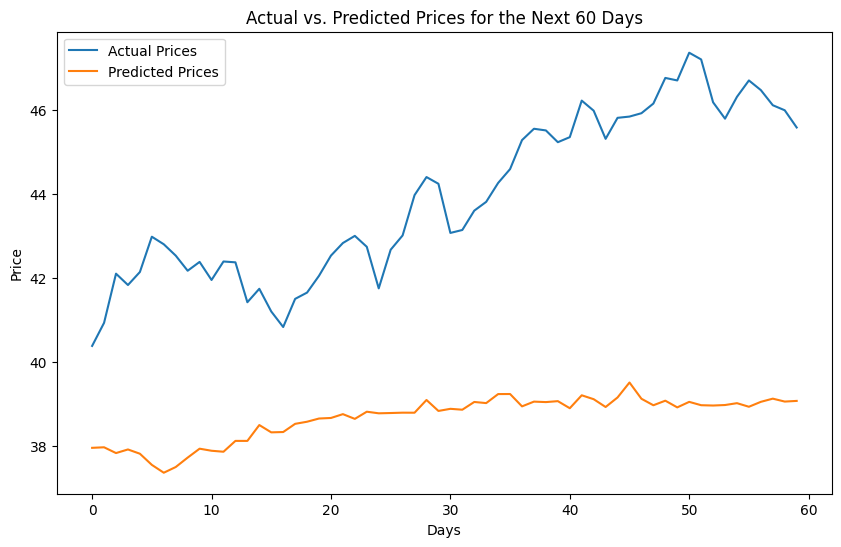

In [50]:
x = df_energy[["Open", "High", "Low", "Volume"]].to_numpy()
y = df_energy["Close"].to_numpy()

# Normalize the input data
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
y_scaled = scaler.fit_transform(y.reshape(-1, 1))

# Prepare sequence data
sequence_length = 100  # Length of input sequences
sequences = []
targets = []

for i in range(len(y_scaled) - sequence_length - 60):
    sequences.append(x_scaled[i:i+sequence_length])
    targets.append(y_scaled[i+sequence_length:i+sequence_length+60])

# Convert lists to NumPy arrays
sequences = np.array(sequences)
targets = np.array(targets)

# Split into training and testing sets
split_ratio = 0.8
split_index = int(split_ratio * len(sequences))

x_train = sequences[:split_index]
y_train = targets[:split_index]

x_test = sequences[split_index:]
y_test = targets[split_index:]

# Build LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(128, return_sequences=True, input_shape=(sequence_length, x.shape[1])))
model_lstm.add(Dropout(0.2))  # Add Dropout layer after each LSTM layer

model_lstm.add(LSTM(64, return_sequences=False))
model_lstm.add(Dropout(0.2))  # Add Dropout layer after each LSTM layer

model_lstm.add(Dense(25))
model_lstm.add(Dense(60))  # Predict 60 days of prices

# Compile the model
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model_lstm.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Make predictions using the model
predictions_scaled = model_lstm.predict(x_test)

# Inverse normalize the predicted results
predictions = scaler.inverse_transform(predictions_scaled)

# Visualize the predicted results
plt.figure(figsize=(10, 6))
plt.plot(y[-60:], label='Actual Prices')
plt.plot(predictions[0], label='Predicted Prices')
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Prices for the Next 60 Days')
plt.legend()
plt.show()

In [52]:
model_energy.save('lstm_model_enegry_V1.h5')